In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10 

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
import seaborn as sea
%matplotlib inline

In [6]:
print(tf.config.list_physical_devices())


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]


In [10]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [11]:
np.shape(x_train)

(50000, 32, 32, 3)

In [12]:
x_train = x_train/255
x_test = x_test/255 #normalizing the train and test data

In [13]:
y_cat_train = to_categorical(y_train) 
y_cat_test = to_categorical(y_test)

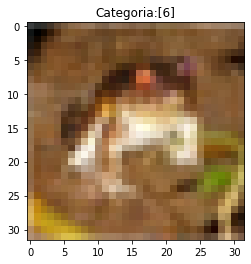

In [14]:
plt.title(f"Categoria:{y_train[0]}")
plt.imshow(x_train[0])

In [15]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(2,2),input_shape=(None,None,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))

model.add(Dense(512,activation="relu"))

model.add(Dense(256,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
early_stop = EarlyStopping(monitor="val_loss",patience=3)

In [19]:
hist = model.fit(x_train,y_cat_train,epochs=3,use_multiprocessing=True,batch_size=550,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/3
91/91 [==============================] - 18s 201ms/step - loss: 0.8091 - accuracy: 0.7134 - val_loss: 0.9977 - val_accuracy: 0.6482
Epoch 2/3
91/91 [==============================] - 18s 201ms/step - loss: 0.7675 - accuracy: 0.7269 - val_loss: 0.9890 - val_accuracy: 0.6543
Epoch 3/3
91/91 [==============================] - 18s 202ms/step - loss: 0.7379 - accuracy: 0.7374 - val_loss: 0.9781 - val_accuracy: 0.6644


In [20]:
dfr = pd.DataFrame(hist.history)

In [21]:
dfr

,loss,accuracy,val_loss,val_accuracy
0,0.809120,0.71340,0.997745,0.6482
1,0.767457,0.72690,0.988981,0.6543
2,0.737875,0.73744,0.978099,0.6644


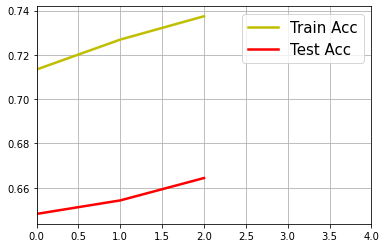

In [22]:
plt.plot(dfr.accuracy,"y",lw=2.5)
plt.plot(dfr.val_accuracy,"r",lw=2.5)
plt.grid(True)
plt.xlim(0,4)
plt.legend(["Train Acc","Test Acc"],fontsize=15)

In [23]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1000
           1       0.77      0.80      0.79      1000
           2       0.61      0.53      0.57      1000
           3       0.43      0.48      0.46      1000
           4       0.63      0.57      0.60      1000
           5       0.58      0.49      0.53      1000
           6       0.70      0.77      0.74      1000
           7       0.74      0.70      0.72      1000
           8       0.74      0.80      0.77      1000
           9       0.72      0.76      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [25]:
confusion_matrix(y_test,predictions)

array([[725,  33,  26,  16,  21,   2,  11,   9, 109,  48],
       [ 23, 803,   3,  11,   3,   5,  15,   1,  46,  90],
       [ 76,  10, 531, 112,  73,  60,  78,  27,  20,  13],
       [ 20,  21,  79, 485,  76, 144,  88,  36,  22,  29],
       [ 22,   8,  87,  84, 575,  44,  73,  81,  16,  10],
       [ 13,  11,  58, 244,  49, 489,  37,  72,  10,  17],
       [  6,   6,  42,  78,  42,  18, 772,   9,  13,  14],
       [ 26,   5,  28,  59,  62,  65,   9, 705,   4,  37],
       [ 72,  36,  10,  19,   6,   6,   7,   3, 799,  42],
       [ 31, 104,   9,  19,   6,   4,   9,  15,  43, 760]], dtype=int64)

<AxesSubplot:>

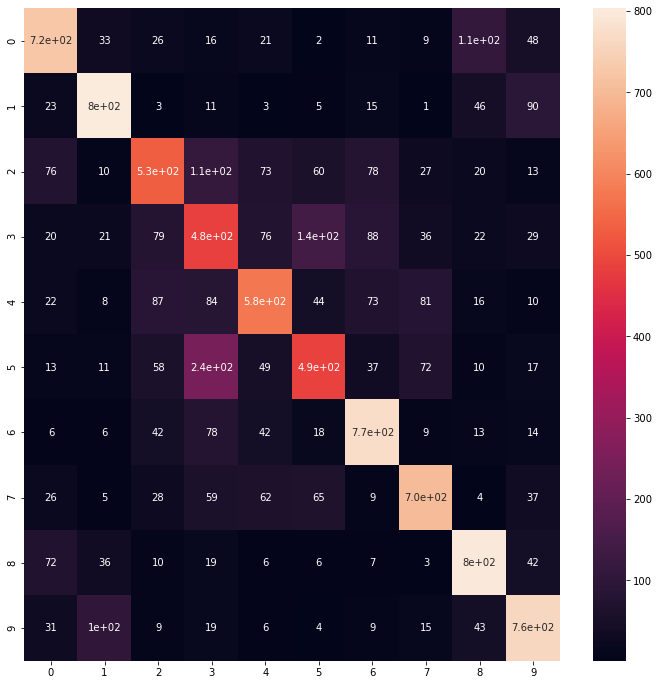

In [26]:
plt.figure(figsize=(12,12))
sea.heatmap(confusion_matrix(y_test,predictions),annot=True)
